## Problem Statement
The overall objective in this hands on exercise is to - predict whether a flight will be delayed or not, based on the information available for flights in January 2019.

    1.Analyze the dataset on - Actual Flight Delay Details by performing the following actions – 
        (a) Identify volume and shape of data 
        (b) Understand the physical significance of each column by reading the data dictionary 
            (Reference Link - https://www.kaggle.com/divyansh22/flight-delay-prediction?select=Jan_2020_ontime.csv) 
        (c) Classify the variables as - Nominal, Ordinal, Interval, Ratio and Categorical, 
        (d) Create a descriptive statistics (min, P25, P50, mean, P75, max, IQR, range, standard deviation, variance,
            coefficient of variation and probability mass function/probability density function) summary report for all
            variables (as applicable) and 
        (e) Detect number of missing values for each column and perform missing value treatment. 
    
    2. Also, submit a reflection in about 200 words with following sections – 
        (a) Results Summary 
        (b) Methodology 
        (c) Libraries & Technologies Used 
        (d) Code with comments and 
        (e) Key Learnings.


### Variable Dictionary
    'DAY_OF_MONTH': Day of the month.
    'DAY_OF_WEEK': Day of the week.
    'OP_UNIQUE_CARRIER': Unique transport code.
    'OP_CARRIER_AIRLINE_ID': Unique aviation operator code.
    'OP_CARRIER': IATA code of the operator.
    'TAIL_NUM': Tail number.
    'OP_CARRIER_FL_NUM': Flight number.
    'ORIGIN_AIRPORT_ID': Origin airport ID.
    'ORIGIN_AIRPORT_SEQ_ID': Origin airport ID - SEQ.
    'ORIGIN': Airport of Origin.
    'DEST_AIRPORT_ID': ID of the destination airport.
    'DEST_AIRPORT_SEQ_ID': Destination airport ID - SEQ.
    'DEST': Destination airport.
    'DEP_TIME': Flight departure time.
    'DEP_DEL15': Departure delay indicator
    'DEP_TIME_BLK': block of time (hour) where the match has been postponed.
    'ARR_TIME': Flight arrival time.
    'ARR_DEL15': Arrival delay indicator.
    'CANCELLED': Flight cancellation indicator.
    'DIVERTED': Indicator if the flight has been diverted.
    'DISTANCE': Distance between airports.
    'Unnamed: 21': Null values, we can drop this column.

In [170]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [133]:
#read the 2019 data into dataframe and check the shape
data_2019 = pd.read_csv("Jan_2019_ontime.csv")
print(data_2019.shape)
data_2019.head()

(583985, 22)


,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


* There are 583985 rows and 22 columns in the 2019 dataset.

In [134]:
#read the 2020 data into dataframe and check the shape
data_2020 = pd.read_csv("Jan_2020_ontime.csv")
print(data_2020.shape)
data_2020.head()

(607346, 22)


,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,...,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,NaN
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,...,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,NaN
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,...,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,NaN
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,...,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,NaN
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,...,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,NaN


* There are 607346 rows and 22 columns in the 2020 dataset.

#### Let's merge the 2019 and 2020 datasets for analysis

In [135]:
#Let's add identifier columns in 2019 and 2020 data
data_2019['year'] = 2019
data_2020['year'] = 2020
data_2020.tail()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21,year
607341,31,5,9E,20363,9E,N331CA,4812,15412,1541205,TYS,...,1002.0,1.0,0700-0759,1128.0,1.0,0.0,0.0,443.0,NaN,2020
607342,31,5,9E,20363,9E,N295PQ,4813,11433,1143302,DTW,...,1747.0,0.0,1700-1759,1933.0,0.0,0.0,0.0,509.0,NaN,2020
607343,31,5,9E,20363,9E,N294PQ,4814,11996,1199603,GSP,...,554.0,0.0,0600-0659,752.0,0.0,0.0,0.0,610.0,NaN,2020
607344,31,5,9E,20363,9E,N228PQ,4815,10397,1039707,ATL,...,1714.0,0.0,1700-1759,1811.0,0.0,0.0,0.0,589.0,NaN,2020
607345,31,5,9E,20363,9E,N228PQ,4815,15919,1591904,XNA,...,1841.0,0.0,1800-1859,2128.0,0.0,0.0,0.0,589.0,NaN,2020


In [136]:
#checking if the columns in both datasets match
print(data_2019.columns == data_2020.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]


* Columns in both the datasets are matching

In [137]:
data_merged = pd.concat([data_2019, data_2020])
data_merged.shape

(1191331, 23)

In [138]:
#checking the data types
data_merged.dtypes

DAY_OF_MONTH               int64
DAY_OF_WEEK                int64
OP_UNIQUE_CARRIER         object
OP_CARRIER_AIRLINE_ID      int64
OP_CARRIER                object
TAIL_NUM                  object
OP_CARRIER_FL_NUM          int64
ORIGIN_AIRPORT_ID          int64
ORIGIN_AIRPORT_SEQ_ID      int64
ORIGIN                    object
DEST_AIRPORT_ID            int64
DEST_AIRPORT_SEQ_ID        int64
DEST                      object
DEP_TIME                 float64
DEP_DEL15                float64
DEP_TIME_BLK              object
ARR_TIME                 float64
ARR_DEL15                float64
CANCELLED                float64
DIVERTED                 float64
DISTANCE                 float64
Unnamed: 21              float64
year                       int64
dtype: object

In [139]:
#classifying the variables
#numeric varialbes
num_var = data_merged._get_numeric_data().columns

#categorical variables
cat_var = list(set(data_merged.columns)-set(num_var))

print('Number of Numerical Variables: ',len(num_var))
print('Numerical columns: ', num_var)
print('Number of Categorical Variables: ', len(cat_var))
print('Categorical columns: ', cat_var)

Number of Numerical Variables:  17
Numerical columns:  Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_CARRIER_AIRLINE_ID',
       'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEP_TIME', 'DEP_DEL15',
       'ARR_TIME', 'ARR_DEL15', 'CANCELLED', 'DIVERTED', 'DISTANCE',
       'Unnamed: 21', 'year'],
      dtype='object')
Number of Categorical Variables:  6
Categorical columns:  ['ORIGIN', 'OP_UNIQUE_CARRIER', 'DEST', 'OP_CARRIER', 'TAIL_NUM', 'DEP_TIME_BLK']


### Dimensionality Reduction
Let's review the features in the dataset and remove unwanted columns

In [140]:
#list the columns in dataset
data_merged.columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST', 'DEP_TIME',
       'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED',
       'DIVERTED', 'DISTANCE', 'Unnamed: 21', 'year'],
      dtype='object')

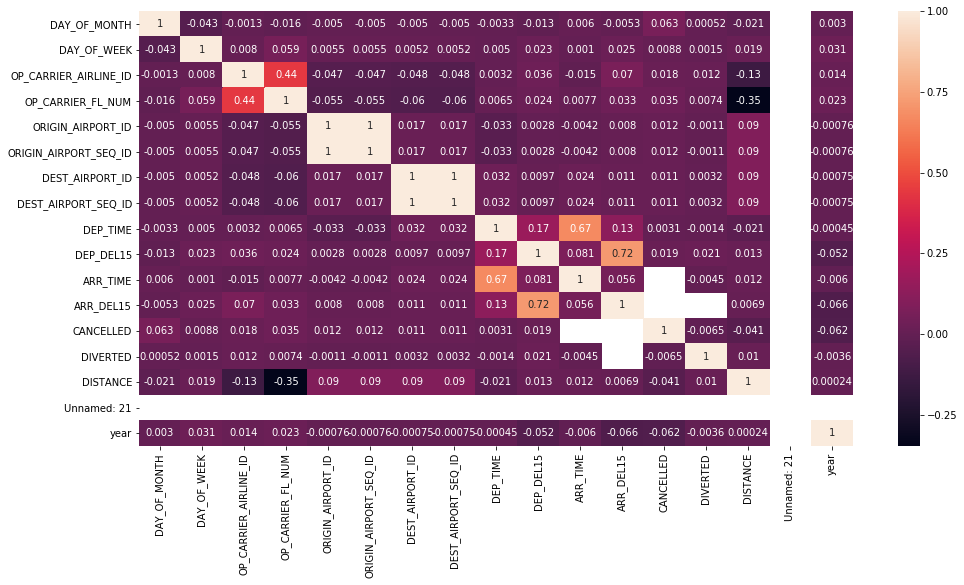

In [141]:
correlation = data_merged.corr()
plt.figure(figsize=(16,8))
sns.heatmap(correlation, annot=True)

In [142]:
#Dropping the unwanted columns
features_drop = ['DAY_OF_MONTH', 'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
                'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN', 'DEST_AIRPORT_SEQ_ID', 'DEST', 'DEP_TIME', 'CANCELLED', 'DIVERTED', 'Unnamed: 21']
data_merged.drop(features_drop, inplace=True, axis=1)
data_merged.head()

,DAY_OF_WEEK,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,DISTANCE,year
0,2,11953,10397,0.0,0600-0659,722.0,0.0,300.0,2019
1,2,13487,11193,0.0,1400-1459,1633.0,0.0,596.0,2019
2,2,11433,11193,0.0,1200-1259,1329.0,0.0,229.0,2019
3,2,15249,10397,0.0,1500-1559,1625.0,0.0,223.0,2019
4,2,10397,11778,0.0,1900-1959,1940.0,0.0,579.0,2019


### Missing  Value treatement

In [143]:
#Number of missing values by column
data_merged.isnull().sum()

DAY_OF_WEEK              0
ORIGIN_AIRPORT_ID        0
DEST_AIRPORT_ID          0
DEP_DEL15            23054
DEP_TIME_BLK             0
ARR_TIME             24136
ARR_DEL15            26100
DISTANCE                 0
year                     0
dtype: int64

In [144]:
#Finding the number of unique values and missing value percentage by column
unique_missing = pd.DataFrame({'unique':data_merged.nunique(), 'missing%':data_merged.isnull().sum()/data_merged.count()})
unique_missing

,unique,missing%
DAY_OF_WEEK,7,0.000000
ORIGIN_AIRPORT_ID,353,0.000000
DEST_AIRPORT_ID,353,0.000000
DEP_DEL15,2,0.019733
DEP_TIME_BLK,19,0.000000
ARR_TIME,1440,0.020679
ARR_DEL15,2,0.022399
DISTANCE,1512,0.000000
year,2,0.000000


* Columns DEP_TIME, DEP_DEL15, ARR_TIME, ARR_DEL15 have minimal missing value percentage (<2.5%) and therefore we can drop the missing value rows here.

In [145]:
#Drop rows with missing values
data_merged.dropna(inplace = True)

In [146]:
#Checking the missing values and data types after treatment
missing_treated = pd.DataFrame({'unique':data_merged.nunique(), 'missing%':data_merged.isnull().sum()/data_merged.count(), 'type':data_merged.dtypes})
missing_treated

,unique,missing%,type
DAY_OF_WEEK,7,0.0,int64
ORIGIN_AIRPORT_ID,353,0.0,int64
DEST_AIRPORT_ID,353,0.0,int64
DEP_DEL15,2,0.0,float64
DEP_TIME_BLK,19,0.0,object
ARR_TIME,1440,0.0,float64
ARR_DEL15,2,0.0,float64
DISTANCE,1511,0.0,float64
year,2,0.0,int64


In [147]:
data_merged['DAY_OF_WEEK'].unique()

array([2, 3, 4, 5, 6, 7, 1], dtype=int64)

In [148]:
#categorizing the DAY_OF_WEEK to weekday or weekend
def get_day_cat(day_of_week):
    if day_of_week <= 5:
        return 0 #weekday
    elif day_of_week > 5:
        return 1 #weekend
    
data_merged.DAY_OF_WEEK = data_merged.DAY_OF_WEEK.apply(get_day_cat)

In [149]:
#creating arrival time block
blocks = []
for hours in range(0,24):
    hour = ('%02d' %(hours))
    blocks.append(hour + '00-' + hour + '59')
blocks

def get_arr_time_blk(arr_time):
    arr_hour = str('%04d' %(arr_time))[:2]
    arr_block = None
    for block in blocks:
        if block.startswith(arr_hour):
            arr_block = block
            break
        
    if arr_block == None and str(arr_time) == '2400.0':
        arr_block = '0000-0059'
    
    return arr_block

data_merged['ARR_TIME_BLK'] = data_merged.ARR_TIME.apply(get_arr_time_blk)
data_merged.drop(['ARR_TIME'], inplace=True, axis=1)
    

In [150]:
#sort columns
data_merged = data_merged.reindex(sorted(data_merged.columns), axis=1)
data_merged.head()

,ARR_DEL15,ARR_TIME_BLK,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DEST_AIRPORT_ID,DISTANCE,ORIGIN_AIRPORT_ID,year
0,0.0,0700-0759,0,0.0,0600-0659,10397,300.0,11953,2019
1,0.0,1600-1659,0,0.0,1400-1459,11193,596.0,13487,2019
2,0.0,1300-1359,0,0.0,1200-1259,11193,229.0,11433,2019
3,0.0,1600-1659,0,0.0,1500-1559,10397,223.0,15249,2019
4,0.0,1900-1959,0,0.0,1900-1959,11778,579.0,10397,2019


In [151]:
#Let's check the unique values in each column to make sure data is consistent
for col in data_merged.columns:
    print(col)
    print(data_merged[col].unique(), '\n---------')

ARR_DEL15
[0. 1.] 
---------
ARR_TIME_BLK
['0700-0759' '1600-1659' '1300-1359' '1900-1959' '0900-0959' '1800-1859'
 '1200-1259' '1700-1759' '2200-2259' '1400-1459' '1500-1559' '1100-1159'
 '0000-0059' '2300-2359' '0800-0859' '2000-2059' '1000-1059' '2100-2159'
 '0600-0659' '0500-0559' '0100-0159' '0400-0459' '0300-0359' '0200-0259'] 
---------
DAY_OF_WEEK
[0 1] 
---------
DEP_DEL15
[0. 1.] 
---------
DEP_TIME_BLK
['0600-0659' '1400-1459' '1200-1259' '1500-1559' '1900-1959' '0900-0959'
 '1000-1059' '2000-2059' '1300-1359' '1100-1159' '0800-0859' '2200-2259'
 '1600-1659' '1700-1759' '2100-2159' '0700-0759' '1800-1859' '0001-0559'
 '2300-2359'] 
---------
DEST_AIRPORT_ID
[10397 11193 11778 13487 12953 10685 11267 11433 14524 11618 10208 13795
 11953 11624 11203 10868 13277 10693 13029 15380 14108 10599 10434 12884
 15412 14122 12451 12007 10721 13485 12478 11423 11612 13230 13871 10431
 14814 12323 11617 12003 14492 12945 10135 14730 13577 14321 15096 11150
 11537 12217 15370 11977 15249 

In [152]:
#We see there is a slot '0001-0559' in DEP_TIME_BLK which seems to be a wrong entry.Let's fix it to '0500-0559'
data_merged.loc[data_merged['DEP_TIME_BLK'] == '0001-0559', 'DEP_TIME_BLK'] = '0500-0559'
data_merged['DEP_TIME_BLK'].unique()

array(['0600-0659', '1400-1459', '1200-1259', '1500-1559', '1900-1959',
       '0900-0959', '1000-1059', '2000-2059', '1300-1359', '1100-1159',
       '0800-0859', '2200-2259', '1600-1659', '1700-1759', '2100-2159',
       '0700-0759', '1800-1859', '0500-0559', '2300-2359'], dtype=object)

### Encoding the categorical variables

In [153]:
#Encoding the target variable 'ARR_DEL15' with LabelEncoder
le = LabelEncoder()
le.fit(blocks)
le.classes_
data_merged['ARR_TIME_BLK'] = le.transform(data_merged.ARR_TIME_BLK.values)
data_merged['DEP_TIME_BLK'] = le.transform(data_merged.DEP_TIME_BLK.values)
print(data_merged['ARR_TIME_BLK'].unique())
print(data_merged['DEP_TIME_BLK'].unique())

[ 7 16 13 19  9 18 12 17 22 14 15 11  0 23  8 20 10 21  6  5  1  4  3  2]
[ 6 14 12 15 19  9 10 20 13 11  8 22 16 17 21  7 18  5 23]


In [154]:
data_merged.head()

,ARR_DEL15,ARR_TIME_BLK,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DEST_AIRPORT_ID,DISTANCE,ORIGIN_AIRPORT_ID,year
0,0.0,7,0,0.0,6,10397,300.0,11953,2019
1,0.0,16,0,0.0,14,11193,596.0,13487,2019
2,0.0,13,0,0.0,12,11193,229.0,11433,2019
3,0.0,16,0,0.0,15,10397,223.0,15249,2019
4,0.0,19,0,0.0,19,11778,579.0,10397,2019


### Building the Logistic Regression Model for Classification

In [160]:
#Splitting the data into training and test set. Will use 2019 data for training the model and 2020 data for testing.
train_data = data_merged[data_merged['year'] == 2019]
xtrain = train_data.drop(['ARR_DEL15', 'year'], axis=1)
ytrain = train_data['ARR_DEL15']
print(xtrain.head())
print(ytrain.head())
print(xtrain.shape, ytrain.shape)

   ARR_TIME_BLK  DAY_OF_WEEK  DEP_DEL15  DEP_TIME_BLK  DEST_AIRPORT_ID  \
0             7            0        0.0             6            10397   
1            16            0        0.0            14            11193   
2            13            0        0.0            12            11193   
3            16            0        0.0            15            10397   
4            19            0        0.0            19            11778   

   DISTANCE  ORIGIN_AIRPORT_ID  
0     300.0              11953  
1     596.0              13487  
2     229.0              11433  
3     223.0              15249  
4     579.0              10397  
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: ARR_DEL15, dtype: float64
(565963, 7) (565963,)


In [161]:
test_data = data_merged[data_merged['year'] == 2020]
xtest = test_data.drop(['ARR_DEL15', 'year'], axis=1)
ytest = test_data['ARR_DEL15']
print(xtest.head())
print(ytest.head())
print(xtest.shape, ytest.shape)

   ARR_TIME_BLK  DAY_OF_WEEK  DEP_DEL15  DEP_TIME_BLK  DEST_AIRPORT_ID  \
0            11            0        0.0            10            11977   
1            12            0        0.0            10            13930   
2            21            0        0.0            18            15412   
3            20            0        0.0            18            12266   
4            13            0        0.0            10            12266   

   DISTANCE  ORIGIN_AIRPORT_ID  
0     174.0              13930  
1     585.0              15370  
2     631.0              11618  
3     253.0              10781  
4    1157.0              14524  
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: ARR_DEL15, dtype: float64
(599268, 7) (599268,)


In [164]:
#training the model
model = LogisticRegression()
model.fit(xtrain, ytrain)
ypred_train = model.predict(xtrain)
train_accuracy = accuracy_score(ytrain, ypred_train)
ypred_test = model.predict(xtest)
test_accuracy = accuracy_score(ytest, ypred_test)
print('Accuracy on training data:',train_accuracy, '\n' 'Accuracy on test data:', test_accuracy)

Accuracy on training data: 0.9170422801490556 
Accuracy on test data: 0.9318835646154976


In [175]:
#Confusion matrix
cmat = confusion_matrix(ytest, ypred_test)
print('Confusion Matrix', '\n', cmat, '\n')
print('Classification Report', '\n', classification_report(ytest, ypred_test))

Confusion Matrix 
 [[496992  19991]
 [ 20829  61456]] 

Classification Report 
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96    516983
         1.0       0.75      0.75      0.75     82285

    accuracy                           0.93    599268
   macro avg       0.86      0.85      0.86    599268
weighted avg       0.93      0.93      0.93    599268

